# Exercise 5.2

## Imports

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import binom

from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

import statsmodels.api as sm

## create a data frame with a bunch of distributions

In [2]:
df = pd.DataFrame()

n = 10000

df["uniform"]   = uniform.rvs  (size=n, loc=10, scale=20)
df["norm"]      = norm.rvs     (size=n, loc=0, scale=1)
df["gamma"]     = gamma.rvs    (size=n, a=5 )
df["expon"]     = expon.rvs    (size=n, scale=1, loc=0)
df["poisson"]   = poisson.rvs  (size=n, mu=3)
df["binom"]     = binom.rvs    (size=n, n=10, p=0.8)


## plot the distributions

<AxesSubplot:ylabel='Density'>

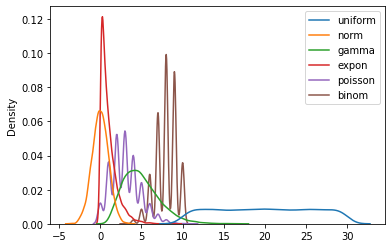

In [3]:
sns.kdeplot(data=df)

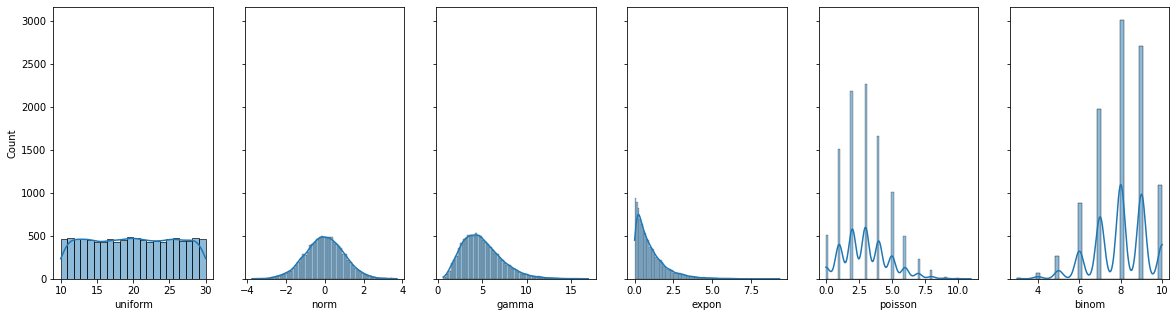

In [4]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(20,5), sharey=True)

for column, ax in zip(df.columns, axes):
    sns.histplot(df[column], ax=ax, kde=True)

In [5]:
## Calculate mean of 100 random samples

In [6]:
nof_samples = 100

random_samples_mean = np.mean(df.sample(nof_samples))
random_samples_mean

uniform    18.861307
norm        0.026558
gamma       5.098115
expon       0.926855
poisson     3.160000
binom       8.110000
dtype: float64

In [7]:
def calculate_x_bar(iterations=1000):
    df_bar = pd.DataFrame()

    x_bar = np.zeros(iterations)

    for column in df.columns:
        for i in range(len(x_bar)):
            random_samples = df[column].sample(nof_samples)
            x_bar[i] = np.mean(random_samples)
        # update the df_bar with the 1000 iterations of 100 samples
        df_bar[column] = x_bar

    return df_bar

## Repeat calculating the mean in 10, 100, and 1000 iterations

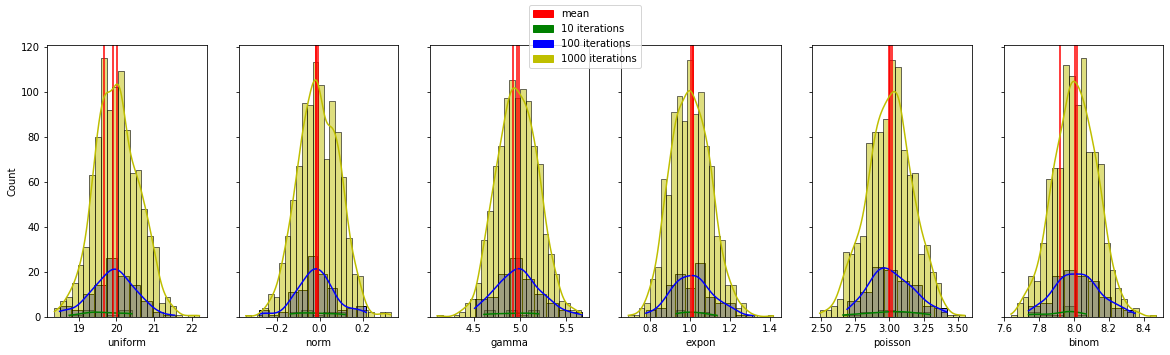

In [8]:
df_bar_list = [calculate_x_bar(10), calculate_x_bar(100), calculate_x_bar(1000)]
hist_color_list = ['g', 'b', 'y']

fig, axes = plt.subplots(1, len(df.columns), figsize=(20,5), sharey=True)

for column, ax in zip(df.columns, axes):
    for df_bar_item, hist_color in zip(df_bar_list, hist_color_list):
        ax.axvline(np.mean(df_bar_item[column]), c='r')
        sns.histplot(df_bar_item[column], ax=ax, kde=True, color=hist_color)


red_patch    = mpatches.Patch(color='r', label='mean')
green_patch  = mpatches.Patch(color='g', label='10 iterations')
blue_patch   = mpatches.Patch(color='b', label='100 iterations')
yellow_patch = mpatches.Patch(color='y', label='1000 iterations')

fig.legend(handles=[red_patch, green_patch, blue_patch, yellow_patch], loc='upper center')
    

### *we can see that the more iterations we will make (each time picking 100 samples), we get closer to a normal distribution*

## Continue analyzing for 1000 iterations

<AxesSubplot:ylabel='Count'>

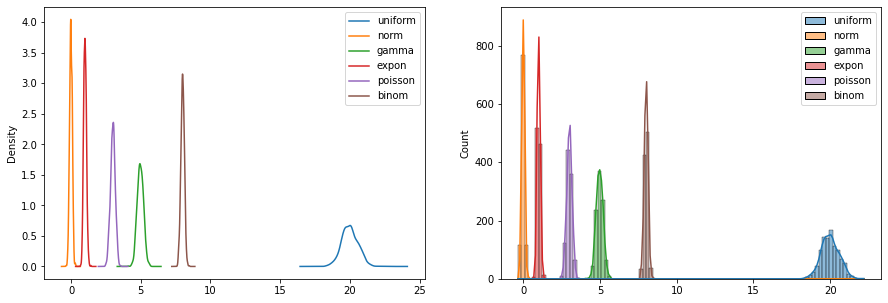

In [9]:
df_bar_1000 = df_bar_list[2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

df_bar_1000.plot.kde(ax=ax1)
sns.histplot(df_bar_1000, kde=True, bins=100, ax=ax2)

### *the distributions are ~N(mu, sigma)*

## scale the distribution using StandardScaler  ((x - mean) / std)

In [10]:
# https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

ss = StandardScaler()
df_bar_scaled = pd.DataFrame(ss.fit_transform(df_bar_1000),columns = df_bar_1000.columns)

<AxesSubplot:ylabel='Count'>

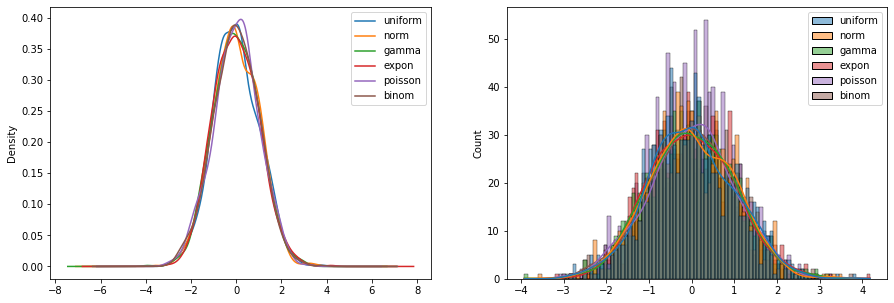

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

df_bar_scaled.plot.kde(ax=ax1)
sns.histplot(df_bar_scaled, kde=True, bins=100, ax=ax2)

### *After Scaling we get distribution more closer to N(0,1)*

## QQ Plots

In [12]:
def plot_mutiple_qq(data_frame):
    fig, axes = plt.subplots(1, len(data_frame.columns), figsize=(20,5), sharey=True)

    for column, ax in zip(data_frame.columns, axes):
        ax.set_title(column)
        sm.qqplot(data_frame[column], line='r', ax=ax) 

### QQ plot for the original distributions

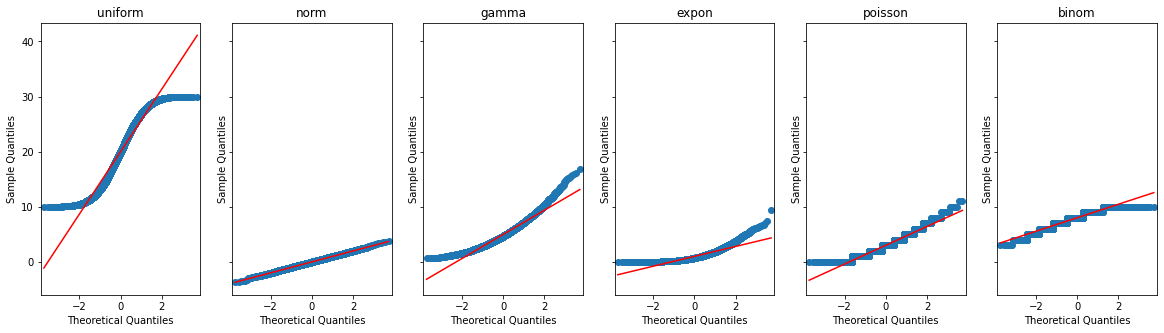

In [13]:
plot_mutiple_qq(df)

### *as we can see, besides the normal distribution, all other disributions does not fit the normal distribution.*

### QQ plot for the means of the distributions (by all means)

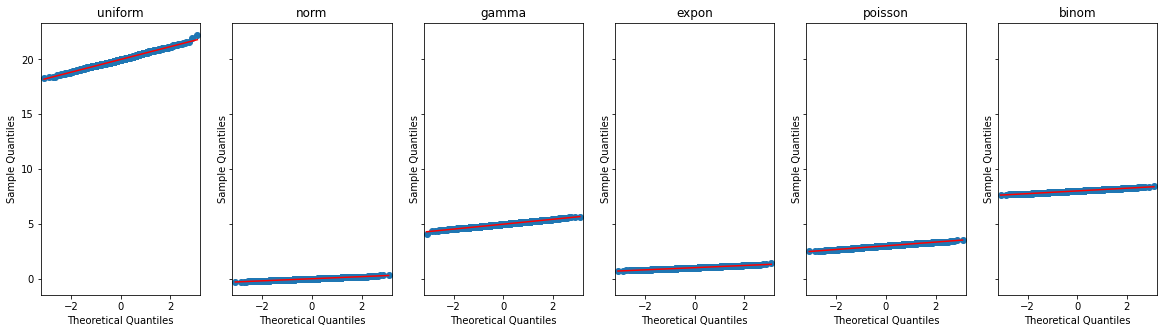

In [14]:
plot_mutiple_qq(df_bar_1000)

### *after iterating on the means, the distribution is ~ N(mu, sigma)*


### QQ plot after scaling

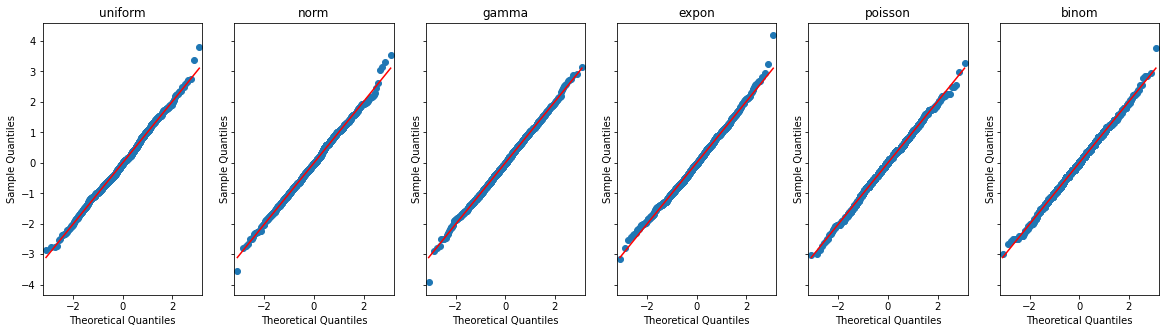

In [15]:
plot_mutiple_qq(df_bar_scaled)

### *according the CLT,*
### *The sample averages will converge to the N(0,1) as we take more samples,*
### * And indeed for n=1000 the distribution of normalized x is closer to the N(0,1).*